## Preparing the Classification Dataset

In [111]:
import numpy as np

In [775]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sklearn

In [776]:
dataset = np.loadtxt('Pokemon_processed.csv', delimiter=',',skiprows =1)

In [777]:
np.set_printoptions(formatter={'float':'{:0.2f}'.format})

In [778]:
dataset = dataset[:,1:]

In [779]:
print(dataset[:10])

[[45.00 49.00 49.00 65.00 65.00 45.00 0.00]
 [60.00 62.00 63.00 80.00 80.00 60.00 0.00]
 [80.00 82.00 83.00 100.00 100.00 80.00 0.00]
 [80.00 100.00 123.00 122.00 120.00 80.00 0.00]
 [39.00 52.00 43.00 60.00 50.00 65.00 0.00]
 [58.00 64.00 58.00 80.00 65.00 80.00 0.00]
 [78.00 84.00 78.00 109.00 85.00 100.00 0.00]
 [78.00 130.00 111.00 130.00 85.00 100.00 0.00]
 [78.00 104.00 78.00 159.00 115.00 100.00 0.00]
 [44.00 48.00 65.00 50.00 64.00 43.00 0.00]]


In [780]:
np.shape(dataset)

(800, 7)

In [781]:
X = dataset[:,:-1]
Y = dataset[:,-1]

In [782]:
# Normalise the data 

mean = X.mean(axis = 0)
std = X.std(axis = 0)
X = (X - mean)/std

In [783]:
print(X[:10])

[[-0.95 -0.92 -0.80 -0.24 -0.25 -0.80]
 [-0.36 -0.52 -0.35 0.22 0.29 -0.29]
 [0.42 0.09 0.29 0.83 1.01 0.40]
 [0.42 0.65 1.58 1.50 1.73 0.40]
 [-1.19 -0.83 -0.99 -0.39 -0.79 -0.11]
 [-0.44 -0.46 -0.51 0.22 -0.25 0.40]
 [0.34 0.15 0.13 1.11 0.47 1.09]
 [0.34 1.57 1.19 1.75 0.47 1.09]
 [0.34 0.77 0.13 2.64 1.55 1.09]
 [-0.99 -0.96 -0.28 -0.70 -0.28 -0.87]]


In [784]:
print('X: ',np.shape(X))
print('Y: ',np.shape(Y))

X:  (800, 6)
Y:  (800,)


In [785]:
# Split data into X: train/test and Y: train/test

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state = 0)

In [786]:
# Calculate total number of Legendary Pokemon in test/train split 

print('Total: ', sum(dataset[:,6]))
print('Train: ',sum(y_train))
print('Test: ',sum(y_test))

Total:  65.0
Train:  35.0
Test:  30.0


## Build and train a NN Classifier

In [787]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [788]:
model = Sequential()

In [789]:
model.add(Dense(4, input_dim = len(X[0,:]), activation = 'relu'))
model.add(Dense(1, input_dim = len(X[0,:]), activation = 'sigmoid'))

In [790]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_47 (Dense)            (None, 4)                 28        
                                                                 
 dense_48 (Dense)            (None, 1)                 5         
                                                                 
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


In [791]:
 model.compile(loss='binary_crossentropy', optimizer = 'rmsprop', metrics =['accuracy'])

In [792]:
model.fit(x = X_train, y = y_train, epochs = 256, verbose = 1)

Epoch 1/256
13/13 [==============================] - 1s 6ms/step - loss: 0.6141 - accuracy: 0.7350
Epoch 2/256
13/13 [==============================] - 0s 5ms/step - loss: 0.5763 - accuracy: 0.7600
Epoch 3/256
13/13 [==============================] - 0s 7ms/step - loss: 0.5486 - accuracy: 0.7800
Epoch 4/256
13/13 [==============================] - 0s 5ms/step - loss: 0.5247 - accuracy: 0.7950
Epoch 5/256
13/13 [==============================] - 0s 4ms/step - loss: 0.5026 - accuracy: 0.8100
Epoch 6/256
13/13 [==============================] - 0s 5ms/step - loss: 0.4822 - accuracy: 0.8175
Epoch 7/256
13/13 [==============================] - 0s 6ms/step - loss: 0.4638 - accuracy: 0.8175
Epoch 8/256
13/13 [==============================] - 0s 3ms/step - loss: 0.4471 - accuracy: 0.8175
Epoch 9/256
13/13 [==============================] - 0s 3ms/step - loss: 0.4317 - accuracy: 0.8200
Epoch 10/256
13/13 [==============================] - 0s 8ms/step - loss: 0.4175 - accuracy: 0.8275
Epoch 11/

## Evaluate the Trained Model 

In [793]:
prediction = model.predict(X_test)

13/13 [==============================] - 0s 2ms/step


In [794]:
prediction_updated = prediction
for i in range(0,len(prediction)):
    if prediction_updated[i] >=0.85: 
        prediction_updated[i] = 1
    else: 
        prediction_updated[i] = 0

In [830]:
print('Pred. # of Legendaries: ', int(sum(prediction_updated)))
print('True # of Legendaries: ', int(sum(y_test)))

Pred. # of Legendaries:  18
True # of Legendaries:  30


In [826]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

$$ Accuracy =   \frac{TP+TN}{TP+TN+FP+FN}$$

$$Precision =  \frac{TP}{TP+FP}$$

$$Recall =  \frac{TP}{TP+FN}$$

In [797]:
# Baseline Accuracy 

1 - sum(y_test)/len(y_test)

0.925

In [798]:
model_accuracy = accuracy_score(y_test, prediction_updated)
model_precision = precision_score(y_test, prediction_updated)
model_recall = sklearn.metrics.recall_score(y_test, prediction_updated)
model_f1 = f1_score(y_test, prediction_updated)
model_roc_auc = roc_auc_score(y_test, prediction_updated)


In [799]:
print('Accuracy: ', model_accuracy)
print('Precision: ', model_precision)
print('Recall: ', model_recall)
print('F1 Score: ', model_f1)
print('Precision: ', model_precision)

Accuracy:  0.945
Precision:  0.7222222222222222
Recall:  0.43333333333333335
F1 Score:  0.5416666666666666
ROC-AUC:  0.70990990990991


In [831]:
import matplotlib.pyplot as plt

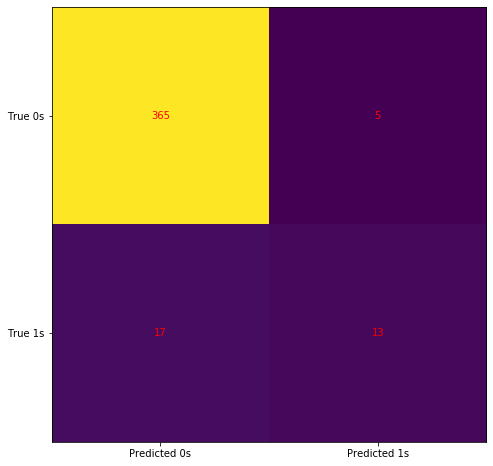

In [833]:
cm = confusion_matrix(y_test, prediction_updated)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('True 0s', 'True 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

## Build and Train a Logistic Regression Model

In [800]:
from sklearn.linear_model import LogisticRegression

In [813]:
model_log_reg = LogisticRegression(solver='liblinear', random_state=0)

In [814]:
model_log_reg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [815]:
model_log_reg.classes_

array([0.00, 1.00])

In [816]:
float(model_log_reg.intercept_)

-4.351599996045692

In [817]:
model_log_reg.coef_

array([[0.45, 0.44, 0.95, 1.03, 0.70, 0.78]])

## Evaluate the Trained Model

In [818]:
model_log_reg.predict_proba(X_test)

array([[1.00, 0.00],
       [0.93, 0.07],
       [1.00, 0.00],
       [1.00, 0.00],
       [1.00, 0.00],
       [0.99, 0.01],
       [1.00, 0.00],
       [0.96, 0.04],
       [0.97, 0.03],
       [0.97, 0.03],
       [1.00, 0.00],
       [1.00, 0.00],
       [1.00, 0.00],
       [0.60, 0.40],
       [0.99, 0.01],
       [1.00, 0.00],
       [0.99, 0.01],
       [0.99, 0.01],
       [0.13, 0.87],
       [0.96, 0.04],
       [1.00, 0.00],
       [0.99, 0.01],
       [0.97, 0.03],
       [0.90, 0.10],
       [0.59, 0.41],
       [1.00, 0.00],
       [0.65, 0.35],
       [0.94, 0.06],
       [0.87, 0.13],
       [0.95, 0.05],
       [0.89, 0.11],
       [0.98, 0.02],
       [1.00, 0.00],
       [0.96, 0.04],
       [0.68, 0.32],
       [0.96, 0.04],
       [0.91, 0.09],
       [0.97, 0.03],
       [1.00, 0.00],
       [1.00, 0.00],
       [1.00, 0.00],
       [0.09, 0.91],
       [0.83, 0.17],
       [0.92, 0.08],
       [1.00, 0.00],
       [1.00, 0.00],
       [0.97, 0.03],
       [1.00,

In [819]:
prediction_log_reg = model_log_reg.predict(X_test)

/Users/zaynpersonal/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/base.py:291: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  indices = (scores > 0).astype(np.int)


In [820]:
print('Pred. # of Legendaries: ', int(sum(prediction_log_reg)))
print('True # of Legendaries: ', int(sum(y_test)))

Pred. # of Legendaries:  29
True # of Legendaries:  30


In [823]:
model_accuracy = accuracy_score(y_test, prediction_log_reg)
model_precision = precision_score(y_test, prediction_log_reg)
model_recall = sklearn.metrics.recall_score(y_test, prediction_log_reg)
model_f1 = f1_score(y_test, prediction_log_reg)
model_roc_auc = roc_auc_score(y_test, prediction_log_reg)

In [824]:
print('Accuracy: ', model_accuracy)
print('Precision: ', model_precision)
print('Recall: ', model_recall)
print('F1 Score: ', model_f1)
print('ROC-AUC: ', model_roc_auc)

Accuracy:  0.9325
Precision:  0.5517241379310345
Recall:  0.5333333333333333
F1 Score:  0.5423728813559322
ROC-AUC:  0.7490990990990991


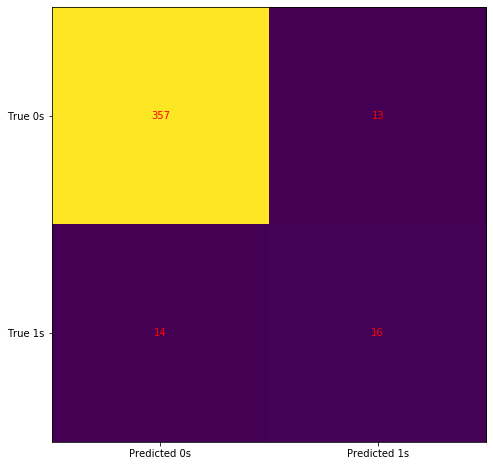

In [834]:
cm_log_reg = confusion_matrix(y_test, prediction_log_reg)

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm_log_reg)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('True 0s', 'True 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_log_reg[i, j], ha='center', va='center', color='red')
plt.show()